In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset
df_train = pd.read_csv(r'..\Datasets\healthcare-dataset-stroke-data.csv')

In [3]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

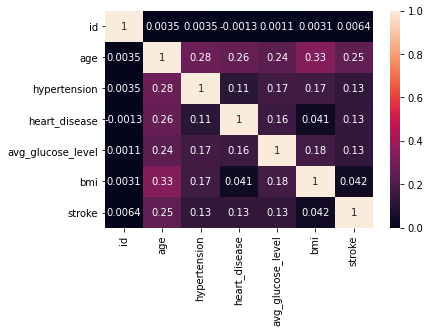

In [5]:
sns.heatmap(df_train.corr(), annot = True)

In [6]:
df_train.drop(columns = 'id', axis = 1, inplace = True)

# Check if there are any null values or not

<AxesSubplot:>

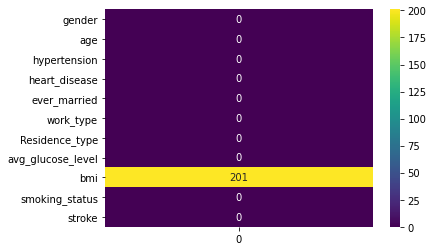

In [7]:
sns.heatmap(df_train.isnull().sum().to_frame(), annot = True, cmap = 'viridis', fmt = 'd')

### Treating Missing Values 

In [8]:
mean_bmi = df_train.groupby(['gender', 'age']).mean()['bmi']

In [9]:
mean_bmi = np.around(mean_bmi, decimals = 3)

In [10]:
import math
def fill_bmi(df_train, mean_bmi):
    if math.isnan(df_train['bmi']):
        return mean_bmi[df_train['gender']][df_train['age']]
    else:
        return df_train['bmi']

In [11]:
df_train['bmi'] = df_train.apply(fill_bmi, axis = 1, args = (mean_bmi, ))
df_train['bmi'].isnull().sum()

1

In [12]:
df_train[df_train['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2030,Male,0.48,0,0,No,children,Urban,73.02,NaN,Unknown,0


In [13]:
df_train['bmi'].iloc[2030] = mean_bmi['Female'][0.48]

C:\Users\Wagle\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<AxesSubplot:>

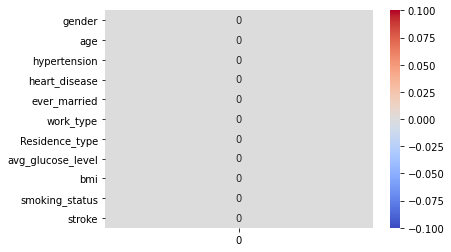

In [15]:
sns.heatmap(df_train.isnull().sum().to_frame(), annot = True, cmap = 'coolwarm')

# EDA

<h3>Percentage of Males and Females suffering from brain stroke. </h3>

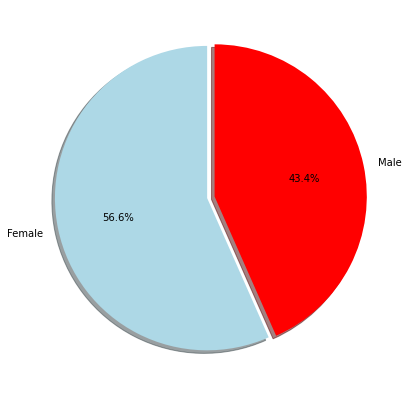

In [16]:
labels = df_train[df_train['stroke'] == 1]['gender'].value_counts(sort = True).index
sizes = df_train[df_train['stroke'] == 1]['gender'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

<b>56.6% of females suffer from brain stroke. </b>

<h3>Residence type of the patients</h3>

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

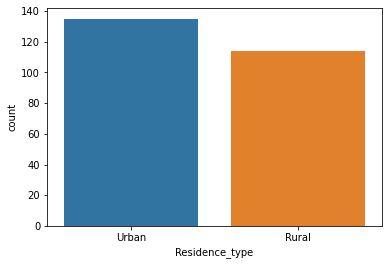

In [17]:
sns.countplot(x = 'Residence_type', data = df_train[df_train['stroke'] == 1])

<b>Urban residents have stroke chances more than rural residents</b>

<h3>Range of bmi of patient suffering stroke. </h3>

C:\Users\Wagle\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

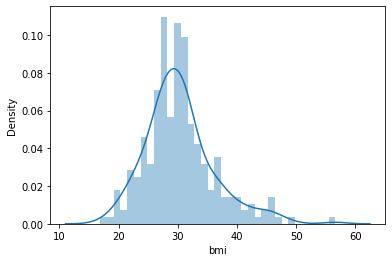

In [18]:
sns.distplot(df_train[df_train['stroke'] == 1]['bmi'].dropna(), bins = 35)

<b>Patients who have bmi around 30-32 suffered from stroke</b>

<h3>Smoking status of the patients suffering stroke.</h3>

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

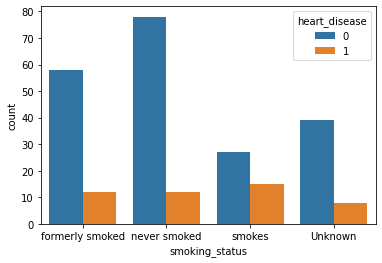

In [19]:
sns.countplot(x = 'smoking_status', data = df_train[df_train['stroke'] == 1], hue = 'heart_disease')

<b>Patients who never smoked or had heart disease suffered from stroke. People who had heart disease and suffered from stroke smoked</b>

<h3>Marriage status and gender of the patients.</h3>

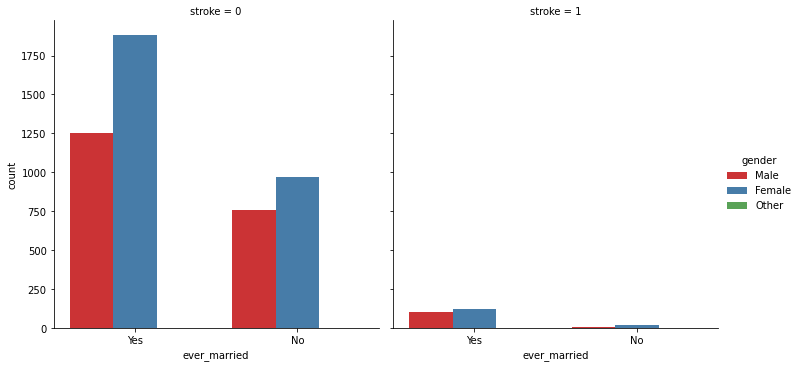

In [20]:
sns.catplot(x = 'ever_married', col = 'stroke', data = df_train, hue = 'gender', kind = 'count', 
            palette = sns.color_palette('Set1'))

<b>More than 1800 married females and around 1250 married males did not have stroke. Around 200 married males and females suffered from brain stroke. </b>

<h3>Count of patients suffering from disease.</h3>

<AxesSubplot:xlabel='stroke', ylabel='count'>

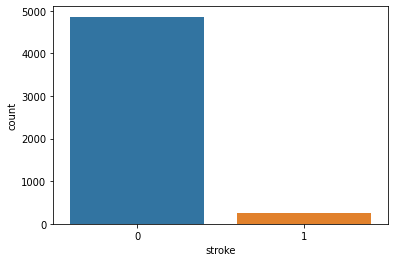

In [21]:
sns.countplot(x = 'stroke', data = df_train)

<b>The dataset is not balanced</b>

## Treating categorical features

In [22]:
df_objects = df_train.select_dtypes(include = 'object')

In [23]:
df = pd.DataFrame(columns = ['Columns', 'Uniques Values', 'No of Unique values']) 
for i, j in zip(df_objects.columns, range(len(df_objects.columns))):
    df.loc[j] = [i, df_train[i].unique(), df_train[i].nunique()]
df

,Columns,Uniques Values,No of Unique values
0,gender,"[Male, Female, Other]",3
1,ever_married,"[Yes, No]",2
2,work_type,"[Private, Self-employed, Govt_job, children, N...",5
3,Residence_type,"[Urban, Rural]",2
4,smoking_status,"[formerly smoked, never smoked, smokes, Unknown]",4


In [24]:
df_train['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [25]:
df_train.drop(index = 3116, inplace = True)

In [26]:
df_train['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### One hot encoding

In [27]:
df_train = pd.get_dummies(df_train, columns= df_objects.columns, dtype = 'int')

In [28]:
df_train.shape

(5109, 21)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   gender_Female                   5109 non-null   int32  
 7   gender_Male                     5109 non-null   int32  
 8   ever_married_No                 5109 non-null   int32  
 9   ever_married_Yes                5109 non-null   int32  
 10  work_type_Govt_job              5109 non-null   int32  
 11  work_type_Never_worked          5109 non-null   int32  
 12  work_type_Private               51

In [30]:
df_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,29.879,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


## Treating Imbalanced Dataset
### As the dataset has only 5109 records, it is necessary to over sample to balance the dataset


In [31]:
def percentage_cal(df):
    zeros = df[df['stroke'] == 0]['stroke'].count()
    ones = df[df['stroke'] == 1]['stroke'].count()
    total = zeros + ones
    # percentage calculation
    print("No Stroke (0's): " + str(round((zeros/total) * 100, 2)) + " %\nStroke Possibility (1's): "
          + str(round((ones/total) * 100, 2)) + ' %')
print(df_train['stroke'].value_counts())
percentage_cal(df_train)

0    4860
1     249
Name: stroke, dtype: int64
No Stroke (0's): 95.13 %
Stroke Possibility (1's): 4.87 %


In [32]:
#pip install imblearn

In [33]:
X = df_train.drop('stroke', axis = 1)
y = df_train['stroke']

In [34]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 2, sampling_strategy = 'minority')
x_res, y_res = smk.fit_resample(X, y)

In [35]:
x_res.shape, y_res.shape

((9654, 20), (9654,))

In [36]:
y_res.value_counts()

1    4827
0    4827
Name: stroke, dtype: int64

# Model

In [37]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state = 17)

In [39]:
#Linear Regression

linear = LinearRegression()
linear.fit(X_train, y_train)
pred_linear = linear.predict(X_test)
pred_linear = np.around(pred_linear).astype('int')


#**Logistic Regression**

logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

#**SVM**

svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)


#**Decision Tree**

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt_clf = dt_clf.predict(X_test)

#**Bagging**

b_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_samples = 100, random_state = 0)
b_clf.fit(X_train, y_train)
pred_b_clf = b_clf.predict(X_test)

#**Random Forest**

rf_clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 100, n_jobs = 100, random_state = 0)
rf_clf.fit(X_train, y_train)
pred_rf_clf = rf_clf.predict(X_test)

# KNN
classifier= KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)


# **Scores**
model_list = ['Linear Regression', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Random Forest', 'KNN']
prediction_list = [pred_linear, pred_logistic, pred_svm, pred_dt_clf, pred_b_clf, pred_rf_clf, y_pred]

dc = dict()
for pred, model in zip(prediction_list, model_list):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='macro')
    dc[model] = {'Accuracy':np.around(accuracy_score(y_test, pred), decimals = 3), 
                   'Precision': np.around(precision, decimals = 3), 
                   'Recall': np.around(recall, decimals = 3), 
                   'F1- score': np.around(f1, decimals = 3), 
                   'ROC AUC Score': np.around(roc_auc_score(y_test, pred), decimals = 3),
                   'RMSE': np.around(np.sqrt(mean_squared_error(y_test, pred)), decimals = 3)
                   }


C:\Users\Wagle\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
dc_scores = pd.DataFrame(dc)
dc_scores

,Linear Regression,Logistic Regression,SVM,Decision Tree,Bagging,Random Forest,KNN
Accuracy,0.951,0.969,0.773,0.945,0.878,0.901,0.927
Precision,0.638,0.971,0.781,0.945,0.879,0.901,0.929
Recall,0.633,0.969,0.775,0.945,0.879,0.901,0.928
F1- score,0.634,0.969,0.772,0.945,0.878,0.901,0.927
ROC AUC Score,0.951,0.969,0.775,0.945,0.879,0.901,0.928
RMSE,0.221,0.175,0.477,0.234,0.350,0.315,0.271


# Logistic Regression model is best performing model.

In [41]:
import pickle
pickle.dump(pred_dt_clf, open('Stroke_Prediction.pkl', 'wb'))